# HOMEWORK 2

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [46]:
#!ls

In [47]:
#!curl https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv --output housing.csv

In [48]:
df = pd.read_csv('housing.csv')

In [49]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='Count'>

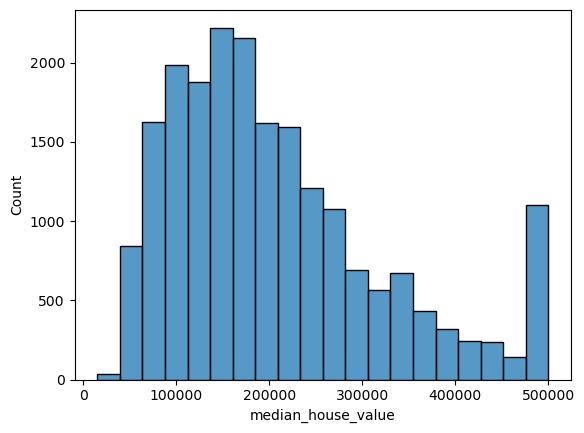

In [50]:
# EDA
sns.histplot(df.median_house_value, bins = 20)

In [51]:
# Preparing the dataset
choice = ['<1H OCEAN', 'INLAND']
df = df[df['ocean_proximity'].isin(choice)]
del df['ocean_proximity']

In [52]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
862,-121.99,37.58,31.0,2878.0,478.0,1276.0,485.0,6.2073,282500.0
863,-122.00,37.58,6.0,4405.0,717.0,2071.0,688.0,5.8151,295600.0
870,-121.93,37.49,5.0,1150.0,311.0,648.0,245.0,3.5714,300000.0
880,-121.99,37.56,18.0,5505.0,1005.0,2641.0,971.0,5.0000,269700.0
881,-121.99,37.56,20.0,6462.0,1294.0,3288.0,1235.0,4.3393,231200.0


In [53]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [54]:
## QUESTION 1
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [55]:
## QUESTION 2
df['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [56]:
## Prepare and split the dataset

In [57]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [58]:
n

15687

In [59]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [60]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [61]:
idx = np.arange(n)

In [62]:
np.random.seed(42)
np.random.shuffle(idx)

In [63]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [64]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [65]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [66]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [67]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [68]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [69]:
len(y_train)

9413

In [70]:
df_train.iloc[10]

longitude             -119.340
latitude                36.320
housing_median_age      14.000
total_rooms           1204.000
total_bedrooms         227.000
population             633.000
households             247.000
median_income            3.925
Name: 10, dtype: float64

In [71]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [72]:
train_linear_regression(df_train, y_train)

(nan, array([nan, nan, nan, nan, nan, nan, nan, nan]))

In [73]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [74]:
base = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

# Fill missing with 0 
X_train = df_train[base].fillna(df.mean()).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [75]:
w0

-9.886305117980955

In [76]:
w

array([-2.57028077e-01, -2.68654049e-01,  1.79886223e-03, -3.87706993e-05,
        3.78923533e-04, -1.49636240e-04,  3.25244227e-04,  1.81954121e-01])

<Axes: ylabel='Count'>

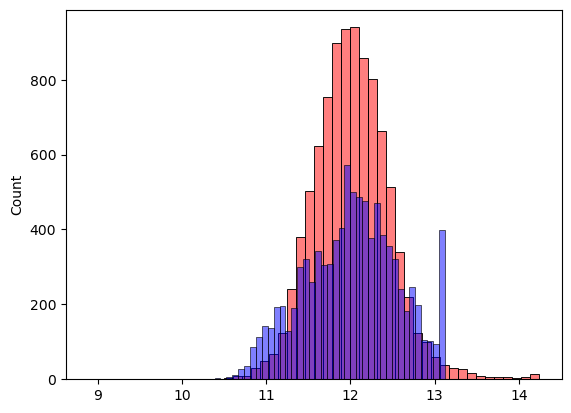

In [77]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


In [78]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [79]:
## QUESTION 3 
rmse(y_train, y_pred)
# Answear: Both are equally good

0.3400294242271122

In [80]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [81]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.34084790341440163

In [82]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [83]:
## QUESTION 4
scores = []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append([r, w0, round(score,1)])
    print(r, w0, round(score,3))

    # ANSWEAR 0 

0 -9.76324947768544 0.341
1e-06 -9.763228831183245 0.341
0.0001 -9.761185235750478 0.341
0.001 -9.7426462494767 0.341
0.01 -9.561056193288358 0.341
0.1 -8.0588897697913 0.341
1 -3.133154278585187 0.345
5 -0.8410867974569756 0.348
10 -0.43811723157775134 0.348


In [84]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.34085069218873254

In [86]:
## QUESTION 5
rmses = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train:n_train+n_val]
    df_test = df.iloc[n_train+n_val:]
    idx = np.arange(n)

    # 
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    base = ['longitude',
     'latitude',
     'housing_median_age',
     'total_rooms',
     'total_bedrooms',
     'population',
     'households',
     'median_income']

    # Fill missing with 0 
    X_train = df_train[base].fillna(0).values
    
    # Train model on train dataset
    w0, w = train_linear_regression(X_train, y_train)
    
    # Validate 
    X_val = df_val[base].fillna(0).values
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    rmses.append(score)
    print(f'Seed: {s} -> rmse = {score}')

print(f'std of all scores is: {round(np.std(rmses),3)}')

Seed: 0 -> rmse = 0.3377387160079039
Seed: 1 -> rmse = 0.3377999353666329
Seed: 2 -> rmse = 0.3384287006762634
Seed: 3 -> rmse = 0.33200494683062565
Seed: 4 -> rmse = 0.33944518625553566
Seed: 5 -> rmse = 0.3433819705285435
Seed: 6 -> rmse = 0.3385330211765444
Seed: 7 -> rmse = 0.3468747697287077
Seed: 8 -> rmse = 0.35127368659605346
Seed: 9 -> rmse = 0.33415582665137267
std of all scores is: 0.005


In [88]:
## QUESTION 6
# Set seed to 9
s = 9
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]
idx = np.arange(n)

np.random.seed(s)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
# Combine train + val dataset
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)


y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_full_train = np.concatenate([y_train, y_val])

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
del df_full_train['median_house_value']

base = ['longitude',
     'latitude',
     'housing_median_age',
     'total_rooms',
     'total_bedrooms',
     'population',
     'households',
     'median_income']

# Fill missing with 0 
X_full_train = df_full_train[base].fillna(0).values
    
# Train model on full train dataset
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)
    
# Validate 
X_test = df_test[base].fillna(0).values
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.33498993366062896